In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("titanic2.csv")

In [3]:
df

PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0              1         0       3    0  22.0      1      0   7.2500         3
1              2         1       1    1  38.0      1      0  71.2833         1
2              3         1       3    1  26.0      0      0   7.9250         3
3              4         1       1    1  35.0      1      0  53.1000         3
4              5         0       3    0  35.0      0      0   8.0500         3
..           ...       ...     ...  ...   ...    ...    ...      ...       ...
884          887         0       2    0  27.0      0      0  13.0000         3
885          888         1       1    1  19.0      0      0  30.0000         3
886          889         0       3    1  60.0      1      2  23.4500         3
887          890         1       1    0  26.0      0      0  30.0000         1
888          891         0       3    0  32.0      0      0   7.7500         2

[889 rows x 9 columns]

In [4]:
y=df.Survived
X=df.drop(columns=['PassengerId','Survived'])

In [5]:
X

Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         3    0  22.0      1      0   7.2500         3
1         1    1  38.0      1      0  71.2833         1
2         3    1  26.0      0      0   7.9250         3
3         1    1  35.0      1      0  53.1000         3
4         3    0  35.0      0      0   8.0500         3
..      ...  ...   ...    ...    ...      ...       ...
884       2    0  27.0      0      0  13.0000         3
885       1    1  19.0      0      0  30.0000         3
886       3    1  60.0      1      2  23.4500         3
887       1    0  26.0      0      0  30.0000         1
888       3    0  32.0      0      0   7.7500         2

[889 rows x 7 columns]

# function ID3(data, target, features):
    if all examples in data have the same class:
        return a leaf node with the class label
    if features is empty:
        return a leaf node with the majority class label in data
    select the best feature, split data into subsets based on the values of the selected feature
    create a decision node for the selected feature
    for each subset created:
        recursively call ID3 on the subset of data
        attach the result as a child node of the decision node
    return the decision node

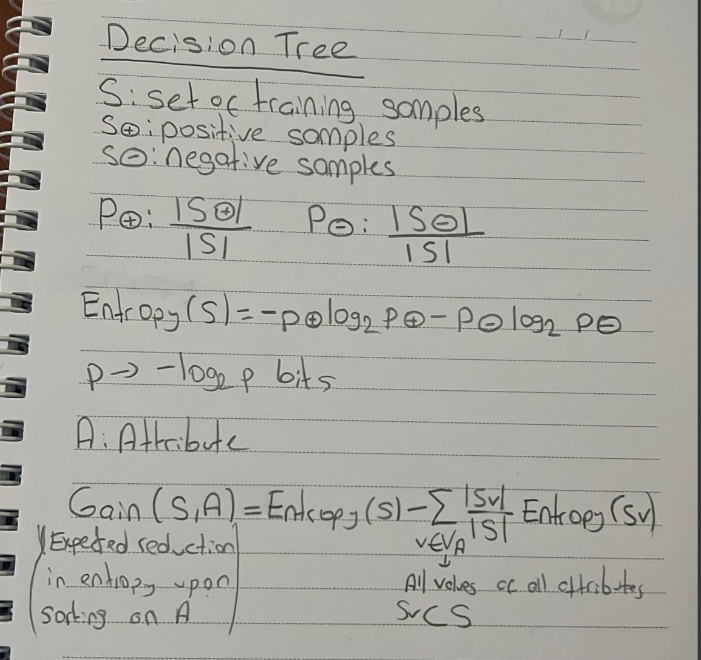

Overfitting engellemek için:
1) Post Pruning
2) Belirgin Değişiklik yoksa
3) Random Forest

In [6]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

def print_scores(y_test,predictions_test):

    accuracy = accuracy_score(y_test, predictions_test)
    precision = precision_score(y_test, predictions_test)
    recall = recall_score(y_test, predictions_test)
    f1 = f1_score(y_test, predictions_test)

    accuracy = round(accuracy, 2)
    precision = round(precision, 2)
    recall = round(recall, 2)
    f1 = round(f1, 2)

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)

def Confusion_matrix(y_test,predictions_test):
    

    conf_matrix = confusion_matrix(y_test, predictions_test)
    print("Confusion Matrix:\n", conf_matrix)
    
    sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

def print_tree(node, depth=0):
    if node is not None:
        print(f"Depth: {depth}"+ f" Feature: {node.feature}, Value: {node.value}, Outcome: {node.outcome}")
        for value, child_node in node.children.items():
            print_tree(child_node, depth + 1)

class Node:
    def __init__(self, feature=None, value=None, outcome=None):
        self.feature = feature
        self.value = value
        self.outcome = outcome
        self.children = {}

def calculate_entropy(data):
    # Calculate entropy of a set of labels
    if len(data) == 0:
        return 0
    
    #Class Number
    _, counts = np.unique(data, return_counts=True)
    
    #Probabilities
    probabilities = counts / len(data)
    
    #Entropy
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy

def calculate_information_gain(data, feature, target):
    # Calculate information gain for a specific feature
    total_entropy = calculate_entropy(target)
    
    # Get unique values and their counts for the specified feature
    values, counts = np.unique(data[feature], return_counts=True)
    #print("Values: ",values)
    
    # Calculate the weighted sum of entropies for subsets based on feature values
    weighted_entropy = sum((counts[i] / len(data)) * calculate_entropy(target[data[feature] == values[i]]) for i in range(len(values)))
    
    # Information gain is the difference between total entropy and weighted entropy    
    information_gain = total_entropy - weighted_entropy
    print(f"Returning information gain of {feature}: ",information_gain)
    return information_gain

def id3(data, target, features):

    # Base case: If all instances in the dataset have the same class, create a leaf node with that class label
    if len(np.unique(target)) == 1:
        print("Base Case 1, returning Leaf Node:", np.unique(target)[0])
        return Node(outcome=np.unique(target)[0])
    
    # Base case: If no features left to split on, create a leaf node with the majority class label    
    if len(features) == 0:
        
        print("Base Case 2, returning Leaf Node:", np.argmax(np.bincount(target)))

        return Node(outcome=np.argmax(np.bincount(target)))

    # Select the best feature to split on based on maximum information gain
    best_feature = max(features, key=lambda x: calculate_information_gain(data, x, target))
    root = Node(feature=best_feature)
    print("---------------------------")
    print("Best Feature is: ", best_feature)
    
    # Iterate over unique values of the selected feature    
    for value in np.unique(data[best_feature]):
        subset_data = data[data[best_feature] == value]
        subset_target = target[data[best_feature] == value]
        print("Selected value: ", value, f"for {best_feature}")
        val, cnt = np.unique(subset_target, return_counts=True)
        print(f"Val: {val}  Count : {cnt}")
        
        # If the subset is empty, create a leaf node with the majority class label        
        if len(subset_data) == 0:
            
       #     print("Subset Empty: ", np.argmax(np.bincount(target)))
            root.children[value] = Node(outcome=np.argmax(np.bincount(target)))
        else:
            
            # Recursively build the tree by calling id3 on the subset of data
            
            print("Recursive Call")
            root.children[value] = id3(subset_data, subset_target, features - {best_feature})
            print_tree(root)
            print("***********************")

    print("Returning Root")
    print_tree(root)
    return root


def predict(node, sample, target):
    # If the current node is a leaf node, return its outcome (predicted class label)
    if node.outcome is not None:
        return node.outcome
    
    # Extract the feature value of the sample for the current node
    value = sample[node.feature]
    
    # If the feature value is not present in the children, handle the case of unseen values
    if value not in node.children:
        return np.argmax(np.bincount(target))  # Predict the majority class label
    
    # Recursively call predict on the child node corresponding to the feature value
    return predict(node.children[value], sample, target)



In [7]:
train_percentage = 0.75
train_size = int(train_percentage * len(X))
X_train, y_train = X.iloc[:train_size], y.iloc[:train_size]
X_test, y_test = X.iloc[train_size:], y.iloc[train_size:]
print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))

Training set size: 666
Testing set size: 223


In [8]:
features_train = set(X_train.columns)
tree_train = id3(X_train, y_train, features_train)


Returning information gain of Pclass:  0.07063919701116372
Returning information gain of Fare:  0.46750632078111837
Returning information gain of Age:  0.11729406591064573
Returning information gain of Embarked:  0.018472414623002087
Returning information gain of Parch:  0.018145696552144597
Returning information gain of SibSp:  0.030031597133621468
Returning information gain of Sex:  0.21867006565516445
---------------------------
Best Feature is:  Fare
Selected value:  0.0 for Fare
Val: [0 1]  Count : [9 1]
Recursive Call
Returning information gain of Pclass:  0.14448434380562808
Returning information gain of Age:  0.4689955935892812
Returning information gain of Embarked:  0.0
Returning information gain of Parch:  0.0
Returning information gain of SibSp:  0.0
Returning information gain of Sex:  0.0
---------------------------
Best Feature is:  Age
Selected value:  19.0 for Age
Val: [0]  Count : [1]
Recursive Call
Base Case 1, returning Leaf Node: 0
Depth: 0 Feature: Age, Value: None

Depth: 0 Feature: Fare, Value: None, Outcome: None
Depth: 1 Feature: Age, Value: None, Outcome: None
Depth: 2 Feature: None, Value: None, Outcome: 0
Depth: 2 Feature: None, Value: None, Outcome: 1
Depth: 2 Feature: None, Value: None, Outcome: 0
Depth: 2 Feature: None, Value: None, Outcome: 0
Depth: 2 Feature: None, Value: None, Outcome: 0
Depth: 2 Feature: None, Value: None, Outcome: 0
Depth: 1 Feature: None, Value: None, Outcome: 0
Depth: 1 Feature: None, Value: None, Outcome: 0
Depth: 1 Feature: None, Value: None, Outcome: 0
Depth: 1 Feature: None, Value: None, Outcome: 0
Depth: 1 Feature: None, Value: None, Outcome: 0
Depth: 1 Feature: None, Value: None, Outcome: 0
Depth: 1 Feature: None, Value: None, Outcome: 0
Depth: 1 Feature: None, Value: None, Outcome: 0
Depth: 1 Feature: None, Value: None, Outcome: 0
Depth: 1 Feature: None, Value: None, Outcome: 0
Depth: 1 Feature: None, Value: None, Outcome: 1
Depth: 1 Feature: Age, Value: None, Outcome: None
Depth: 2 Feature: None, Value: No

Depth: 0 Feature: Age, Value: None, Outcome: None
Depth: 1 Feature: None, Value: None, Outcome: 1
Depth: 1 Feature: Pclass, Value: None, Outcome: None
Depth: 2 Feature: SibSp, Value: None, Outcome: None
Depth: 3 Feature: Embarked, Value: None, Outcome: None
Depth: 4 Feature: Parch, Value: None, Outcome: None
Depth: 5 Feature: Sex, Value: None, Outcome: None
Depth: 6 Feature: None, Value: None, Outcome: 0
Depth: 1 Feature: None, Value: None, Outcome: 1
***********************
Selected value:  23.0 for Age
Val: [0]  Count : [1]
Recursive Call
Base Case 1, returning Leaf Node: 0
Depth: 0 Feature: Age, Value: None, Outcome: None
Depth: 1 Feature: None, Value: None, Outcome: 1
Depth: 1 Feature: Pclass, Value: None, Outcome: None
Depth: 2 Feature: SibSp, Value: None, Outcome: None
Depth: 3 Feature: Embarked, Value: None, Outcome: None
Depth: 4 Feature: Parch, Value: None, Outcome: None
Depth: 5 Feature: Sex, Value: None, Outcome: None
Depth: 6 Feature: None, Value: None, Outcome: 0
Depth: 1 

Selected value:  46.9 for Fare
Val: [0]  Count : [4]
Recursive Call
Base Case 1, returning Leaf Node: 0
Depth: 0 Feature: Fare, Value: None, Outcome: None
Depth: 1 Feature: Age, Value: None, Outcome: None
Depth: 2 Feature: None, Value: None, Outcome: 0
Depth: 2 Feature: None, Value: None, Outcome: 1
Depth: 2 Feature: None, Value: None, Outcome: 0
Depth: 2 Feature: None, Value: None, Outcome: 0
Depth: 2 Feature: None, Value: None, Outcome: 0
Depth: 2 Feature: None, Value: None, Outcome: 0
Depth: 1 Feature: None, Value: None, Outcome: 0
Depth: 1 Feature: None, Value: None, Outcome: 0
Depth: 1 Feature: None, Value: None, Outcome: 0
Depth: 1 Feature: None, Value: None, Outcome: 0
Depth: 1 Feature: None, Value: None, Outcome: 0
Depth: 1 Feature: None, Value: None, Outcome: 0
Depth: 1 Feature: None, Value: None, Outcome: 0
Depth: 1 Feature: None, Value: None, Outcome: 0
Depth: 1 Feature: None, Value: None, Outcome: 0
Depth: 1 Feature: None, Value: None, Outcome: 0
Depth: 1 Feature: None, Val

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [9]:
predictions_test = [predict(tree_train, X_test.iloc[i], y_train) for i in range(len(X_test))]


Confusion Matrix:
 [[123  19]
 [ 46  35]]


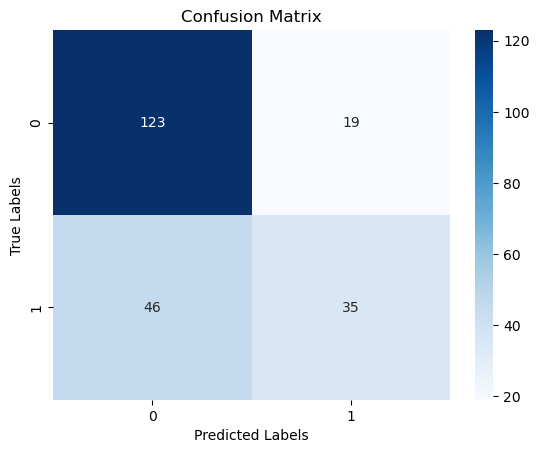

In [10]:
Confusion_matrix(y_test,predictions_test)

In [11]:
print_scores(y_test,predictions_test)

Accuracy: 0.71
Precision: 0.65
Recall: 0.43
F1 Score: 0.52


In [12]:
bins = [0, 18, 35, 50, 65, 100]
labels = ['0-18', '19-35', '36-50', '51-65', '66-100']
df['age_group'] = pd.cut(df['Age'], bins=bins, labels=labels)
age_group_mapping = {'0-18': 1, '19-35': 2, '36-50': 3, '51-65': 4, '66-100': 5}
df['age_group'] = df['age_group'].map(age_group_mapping).astype('int64')

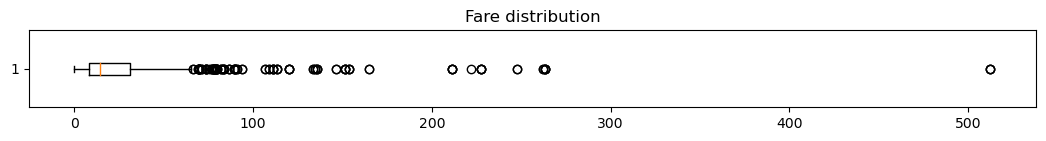

In [13]:
plt.figure(figsize=(13,1))
plt.title('Fare distribution')
plt.boxplot(df['Fare'], vert=False)
plt.show()

Text(0, 0.5, 'Frequency')

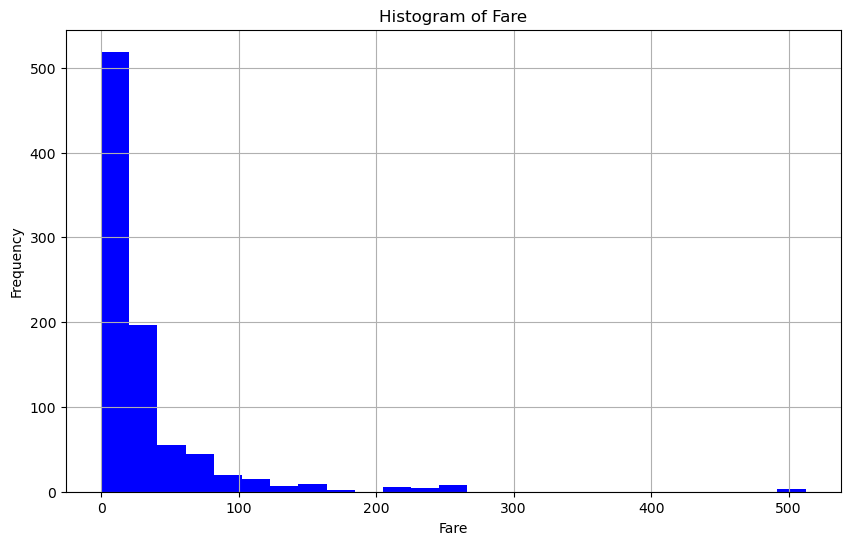

In [14]:
df.hist(column='Fare', bins=25, color='blue', figsize=(10, 6))
plt.title('Histogram of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')

In [15]:
bins = [0, 10, 20, 30, 50, 80,200, 600]
labels = ['0-10', '11-20', '21-30', '31-50', '51-80','81-200','201-600']
df['Fare_group'] = pd.cut(df['Fare'], bins=bins, labels=labels, right=False, include_lowest=True)
fare_group_mapping = {'0-10':1, '11-20':2, '21-30':3, '31-50':4, '51-80':5,'81-200':6,'201-600':7}
df['Fare_group'] = df['Fare_group'].map(fare_group_mapping).astype('int64')

In [16]:
y=df.Survived
X=df.drop(columns=['PassengerId','Survived',"Age","Fare"])

In [17]:
X

Pclass  Sex  SibSp  Parch  Embarked  age_group  Fare_group
0         3    0      1      0         3          2           1
1         1    1      1      0         1          3           5
2         3    1      0      0         3          2           1
3         1    1      1      0         3          2           5
4         3    0      0      0         3          2           1
..      ...  ...    ...    ...       ...        ...         ...
884       2    0      0      0         3          2           2
885       1    1      0      0         3          2           4
886       3    1      1      2         3          4           3
887       1    0      0      0         1          2           4
888       3    0      0      0         2          2           1

[889 rows x 7 columns]

In [18]:
train_percentage = 0.75
train_size = int(train_percentage * len(X))
X_train, y_train = X.iloc[:train_size], y.iloc[:train_size]
X_test, y_test = X.iloc[train_size:], y.iloc[train_size:]
print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))

Training set size: 666
Testing set size: 223


In [19]:
features_train = set(X_train.columns)
tree_train = id3(X_train, y_train, features_train)

Returning information gain of Pclass:  0.07063919701116372
Returning information gain of age_group:  0.011432395555867614
Returning information gain of Embarked:  0.018472414623002087
Returning information gain of Parch:  0.018145696552144597
Returning information gain of SibSp:  0.030031597133621468
Returning information gain of Fare_group:  0.08265160745024414
Returning information gain of Sex:  0.21867006565516445
---------------------------
Best Feature is:  Sex
Selected value:  0 for Sex
Val: [0 1]  Count : [344  80]
Recursive Call
Returning information gain of Pclass:  0.02941538394525145
Returning information gain of age_group:  0.021193968025992826
Returning information gain of Embarked:  0.012270535584917086
Returning information gain of Parch:  0.011574521570309582
Returning information gain of SibSp:  0.01772115704147892
Returning information gain of Fare_group:  0.04141826322440623
---------------------------
Best Feature is:  Fare_group
Selected value:  1 for Fare_group
Va

Returning information gain of age_group:  0.12138397431437953
Returning information gain of Embarked:  0.0
Returning information gain of Parch:  0.004496825878906985
---------------------------
Best Feature is:  Pclass
Selected value:  1 for Pclass
Val: [0 1]  Count : [9 1]
Recursive Call
Returning information gain of Embarked:  0.14448434380562808
Returning information gain of age_group:  0.1935068433729344
Returning information gain of Parch:  0.10803154614560007
---------------------------
Best Feature is:  age_group
Selected value:  2 for age_group
Val: [0 1]  Count : [2 1]
Recursive Call
Returning information gain of Embarked:  0.2516291673878229
Returning information gain of Parch:  0.2516291673878229
---------------------------
Best Feature is:  Embarked
Selected value:  1 for Embarked
Val: [0 1]  Count : [1 1]
Recursive Call
Returning information gain of Parch:  1.0
---------------------------
Best Feature is:  Parch
Selected value:  0 for Parch
Val: [0]  Count : [1]
Recursive 

Val: [0]  Count : [4]
Recursive Call
Base Case 1, returning Leaf Node: 0
Depth: 0 Feature: age_group, Value: None, Outcome: None
Depth: 1 Feature: None, Value: None, Outcome: 0
***********************
Selected value:  2 for age_group
Val: [1]  Count : [1]
Recursive Call
Base Case 1, returning Leaf Node: 1
Depth: 0 Feature: age_group, Value: None, Outcome: None
Depth: 1 Feature: None, Value: None, Outcome: 0
Depth: 1 Feature: None, Value: None, Outcome: 1
***********************
Selected value:  4 for age_group
Val: [0]  Count : [3]
Recursive Call
Base Case 1, returning Leaf Node: 0
Depth: 0 Feature: age_group, Value: None, Outcome: None
Depth: 1 Feature: None, Value: None, Outcome: 0
Depth: 1 Feature: None, Value: None, Outcome: 1
Depth: 1 Feature: None, Value: None, Outcome: 0
***********************
Returning Root
Depth: 0 Feature: age_group, Value: None, Outcome: None
Depth: 1 Feature: None, Value: None, Outcome: 0
Depth: 1 Feature: None, Value: None, Outcome: 1
Depth: 1 Feature: No

In [20]:
predictions_test = [predict(tree_train, X_test.iloc[i], y_train) for i in range(len(X_test))]

Confusion Matrix:
 [[129  13]
 [ 31  50]]


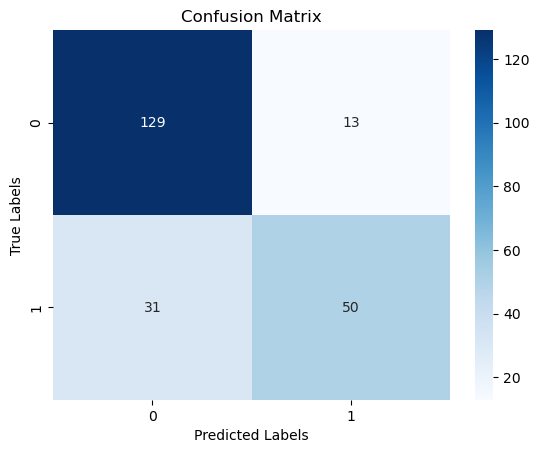

In [21]:
Confusion_matrix(y_test,predictions_test)

In [22]:
print_scores(y_test,predictions_test)

Accuracy: 0.8
Precision: 0.79
Recall: 0.62
F1 Score: 0.69


In [23]:
df.Fare.describe()

count    889.000000
mean      32.096681
std       49.697504
min        0.000000
25%        7.895800
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [24]:
bins = [0, 8, 15, 31, 515]
labels = ['0-8', '9-15', '16-31', '32-515']
df['Fare_group'] = pd.cut(df['Fare'], bins=bins, labels=labels, right=False, include_lowest=True)
fare_group_mapping = {'0-8':1, '9-15':2, '16-31':3, '32-515':4}
df['Fare_group'] = df['Fare_group'].map(fare_group_mapping).astype('int64')

In [25]:
y=df.Survived
X=df.drop(columns=['PassengerId','Survived',"Age","Fare"])

In [26]:
X

Pclass  Sex  SibSp  Parch  Embarked  age_group  Fare_group
0         3    0      1      0         3          2           1
1         1    1      1      0         1          3           4
2         3    1      0      0         3          2           1
3         1    1      1      0         3          2           4
4         3    0      0      0         3          2           2
..      ...  ...    ...    ...       ...        ...         ...
884       2    0      0      0         3          2           2
885       1    1      0      0         3          2           3
886       3    1      1      2         3          4           3
887       1    0      0      0         1          2           3
888       3    0      0      0         2          2           1

[889 rows x 7 columns]

In [27]:
train_percentage = 0.75
train_size = int(train_percentage * len(X))
X_train, y_train = X.iloc[:train_size], y.iloc[:train_size]
X_test, y_test = X.iloc[train_size:], y.iloc[train_size:]
print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))

Training set size: 666
Testing set size: 223


In [28]:
features_train = set(X_train.columns)
tree_train = id3(X_train, y_train, features_train)
predictions_test = [predict(tree_train, X_test.iloc[i], y_train) for i in range(len(X_test))]

Returning information gain of Pclass:  0.07063919701116372
Returning information gain of age_group:  0.011432395555867614
Returning information gain of Embarked:  0.018472414623002087
Returning information gain of Parch:  0.018145696552144597
Returning information gain of SibSp:  0.030031597133621468
Returning information gain of Fare_group:  0.05488087721496815
Returning information gain of Sex:  0.21867006565516445
---------------------------
Best Feature is:  Sex
Selected value:  0 for Sex
Val: [0 1]  Count : [344  80]
Recursive Call
Returning information gain of Pclass:  0.02941538394525145
Returning information gain of age_group:  0.021193968025992826
Returning information gain of Embarked:  0.012270535584917086
Returning information gain of Parch:  0.011574521570309582
Returning information gain of SibSp:  0.01772115704147892
Returning information gain of Fare_group:  0.028726095845549637
---------------------------
Best Feature is:  Pclass
Selected value:  1 for Pclass
Val: [0 1

Returning information gain of Embarked:  0.017247451512109047
Returning information gain of Parch:  0.0
---------------------------
Best Feature is:  Embarked
Selected value:  1 for Embarked
Val: [0 1]  Count : [6 2]
Recursive Call
Returning information gain of Parch:  0.0
---------------------------
Best Feature is:  Parch
Selected value:  0 for Parch
Val: [0 1]  Count : [6 2]
Recursive Call
Base Case 2, returning Leaf Node: 0
Depth: 0 Feature: Parch, Value: None, Outcome: None
Depth: 1 Feature: None, Value: None, Outcome: 0
***********************
Returning Root
Depth: 0 Feature: Parch, Value: None, Outcome: None
Depth: 1 Feature: None, Value: None, Outcome: 0
Depth: 0 Feature: Embarked, Value: None, Outcome: None
Depth: 1 Feature: Parch, Value: None, Outcome: None
Depth: 2 Feature: None, Value: None, Outcome: 0
***********************
Selected value:  2 for Embarked
Val: [0 1]  Count : [2 1]
Recursive Call
Returning information gain of Parch:  0.0
---------------------------
Best Fe

Returning information gain of Fare_group:  0.06636679455866684
Returning information gain of Parch:  0.0
---------------------------
Best Feature is:  Fare_group
Selected value:  1 for Fare_group
Val: [0 1]  Count : [42  2]
Recursive Call
Returning information gain of Embarked:  0.02835453515530939
Returning information gain of Parch:  0.0
---------------------------
Best Feature is:  Embarked
Selected value:  1 for Embarked
Val: [0 1]  Count : [9 1]
Recursive Call
Returning information gain of Parch:  0.0
---------------------------
Best Feature is:  Parch
Selected value:  0 for Parch
Val: [0 1]  Count : [9 1]
Recursive Call
Base Case 2, returning Leaf Node: 0
Depth: 0 Feature: Parch, Value: None, Outcome: None
Depth: 1 Feature: None, Value: None, Outcome: 0
***********************
Returning Root
Depth: 0 Feature: Parch, Value: None, Outcome: None
Depth: 1 Feature: None, Value: None, Outcome: 0
Depth: 0 Feature: Embarked, Value: None, Outcome: None
Depth: 1 Feature: Parch, Value: None

Selected value:  0 for Parch
Val: [0 1]  Count : [2 1]
Recursive Call
Base Case 2, returning Leaf Node: 0
Depth: 0 Feature: Parch, Value: None, Outcome: None
Depth: 1 Feature: None, Value: None, Outcome: 0
***********************
Selected value:  1 for Parch
Val: [1]  Count : [2]
Recursive Call
Base Case 1, returning Leaf Node: 1
Depth: 0 Feature: Parch, Value: None, Outcome: None
Depth: 1 Feature: None, Value: None, Outcome: 0
Depth: 1 Feature: None, Value: None, Outcome: 1
***********************
Returning Root
Depth: 0 Feature: Parch, Value: None, Outcome: None
Depth: 1 Feature: None, Value: None, Outcome: 0
Depth: 1 Feature: None, Value: None, Outcome: 1
Depth: 0 Feature: Embarked, Value: None, Outcome: None
Depth: 1 Feature: None, Value: None, Outcome: 0
Depth: 1 Feature: Parch, Value: None, Outcome: None
Depth: 2 Feature: None, Value: None, Outcome: 0
Depth: 2 Feature: None, Value: None, Outcome: 1
***********************
Returning Root
Depth: 0 Feature: Embarked, Value: None, Ou

Returning information gain of Parch:  0.5435644431995964
---------------------------
Best Feature is:  age_group
Selected value:  1 for age_group
Val: [0]  Count : [4]
Recursive Call
Base Case 1, returning Leaf Node: 0
Depth: 0 Feature: age_group, Value: None, Outcome: None
Depth: 1 Feature: None, Value: None, Outcome: 0
***********************
Selected value:  2 for age_group
Val: [1]  Count : [1]
Recursive Call
Base Case 1, returning Leaf Node: 1
Depth: 0 Feature: age_group, Value: None, Outcome: None
Depth: 1 Feature: None, Value: None, Outcome: 0
Depth: 1 Feature: None, Value: None, Outcome: 1
***********************
Selected value:  4 for age_group
Val: [0]  Count : [3]
Recursive Call
Base Case 1, returning Leaf Node: 0
Depth: 0 Feature: age_group, Value: None, Outcome: None
Depth: 1 Feature: None, Value: None, Outcome: 0
Depth: 1 Feature: None, Value: None, Outcome: 1
Depth: 1 Feature: None, Value: None, Outcome: 0
***********************
Returning Root
Depth: 0 Feature: age_grou

Returning information gain of SibSp:  0.20721002674481154
Returning information gain of Embarked:  0.0
Returning information gain of age_group:  0.07903643272507865
Returning information gain of Parch:  0.03827452220629257
---------------------------
Best Feature is:  SibSp
Selected value:  0 for SibSp
Val: [0]  Count : [1]
Recursive Call
Base Case 1, returning Leaf Node: 0
Depth: 0 Feature: SibSp, Value: None, Outcome: None
Depth: 1 Feature: None, Value: None, Outcome: 0
***********************
Selected value:  1 for SibSp
Val: [0 1]  Count : [1 1]
Recursive Call
Returning information gain of Embarked:  0.0
Returning information gain of age_group:  0.0
Returning information gain of Parch:  0.0
---------------------------
Best Feature is:  Embarked
Selected value:  3 for Embarked
Val: [0 1]  Count : [1 1]
Recursive Call
Returning information gain of age_group:  0.0
Returning information gain of Parch:  0.0
---------------------------
Best Feature is:  age_group
Selected value:  3 for a

Confusion Matrix:
 [[128  14]
 [ 35  46]]


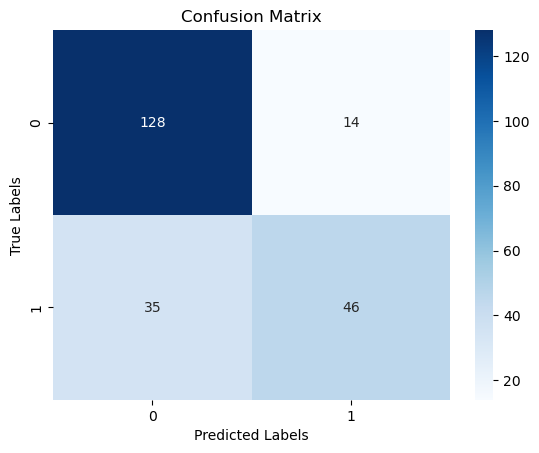

In [29]:
Confusion_matrix(y_test,predictions_test)

In [30]:
print_scores(y_test,predictions_test)

Accuracy: 0.78
Precision: 0.77
Recall: 0.57
F1 Score: 0.65


In [40]:
df

PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  \
0              1         0       3    0  22.0      1      0   7.2500   
1              2         1       1    1  38.0      1      0  71.2833   
2              3         1       3    1  26.0      0      0   7.9250   
3              4         1       1    1  35.0      1      0  53.1000   
4              5         0       3    0  35.0      0      0   8.0500   
..           ...       ...     ...  ...   ...    ...    ...      ...   
884          887         0       2    0  27.0      0      0  13.0000   
885          888         1       1    1  19.0      0      0  30.0000   
886          889         0       3    1  60.0      1      2  23.4500   
887          890         1       1    0  26.0      0      0  30.0000   
888          891         0       3    0  32.0      0      0   7.7500   

     Embarked  age_group  Fare_group  
0           3          2           1  
1           1          3           4  
2           3          2           1  
3           3          2           4  
4           3          2           2  
..        ...        ...         ...  
884         3          2           2  
885         3          2           3  
886         3          4           3  
887         1          2           3  
888         2          2           1  

[889 rows x 11 columns]

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

In [32]:
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)


In [33]:
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)


Confusion Matrix:
 [[127  15]
 [ 29  52]]


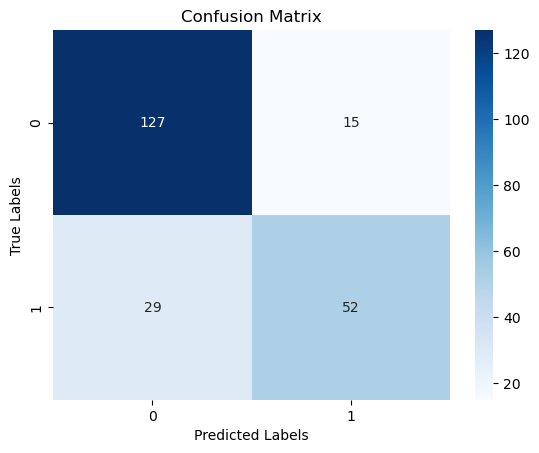

In [34]:
Confusion_matrix(y_test,y_pred)

In [35]:
print_scores(y_test,y_pred)

Accuracy: 0.8
Precision: 0.78
Recall: 0.64
F1 Score: 0.7


 [[129  13]
 [ 31  50]]

Accuracy: 0.8
Precision: 0.79
Recall: 0.62
F1 Score: 0.69

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [37]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a logistic regression model
model = LogisticRegression(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

Confusion Matrix:
 [[130  12]
 [ 26  55]]


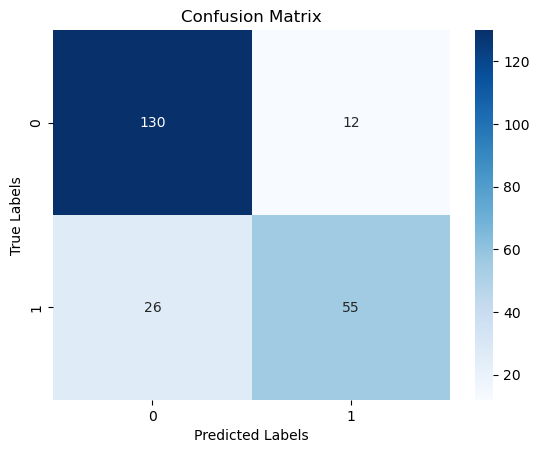

In [38]:
Confusion_matrix(y_test,y_pred)

In [39]:
print_scores(y_test,y_pred)

Accuracy: 0.83
Precision: 0.82
Recall: 0.68
F1 Score: 0.74


Logistic regression without label encoding

Accuracy: 0.83
Precision: 0.82
Recall: 0.67
F1 Score: 0.73
Confusion Matrix:
 [[130  12]
 [ 27  54]]